In [1]:
#　From https://www.kaggle.com/sohamsave/bike-renting-analysis

# 我覺得自己看，沒有解說太沒有效率...這些大神太強了，跨隆牟

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import os
# print(os.listdir("../input"))

In [3]:
import matplotlib.pyplot as plt # Pyplot是使matplotlib像MATLAB一樣工作的命令樣式函數的集合
import seaborn as sns
%matplotlib inline

In [4]:
day_df=pd.read_csv('data/bike-sharing_D.C./day.csv')

In [5]:
hour_df=pd.read_csv('data/bike-sharing_D.C./hour.csv')

In [6]:
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [7]:
day_df.tail(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [8]:
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [9]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [10]:
# temp 溫度(攝氏)
# atemp 體感溫度(攝氏)
# humidity 相對濕度
# windspeed 風速
# casual 沒註冊的使用者租借數量
# registered 已註冊的使用者租借數量
# count 總租借數量

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
day_df.drop('instant',axis=1,inplace=True)

In [14]:
day_df.groupby('yr').size() 
# data['diagnosis'].value_counts() # 效果一樣

yr
0    365
1    366
dtype: int64

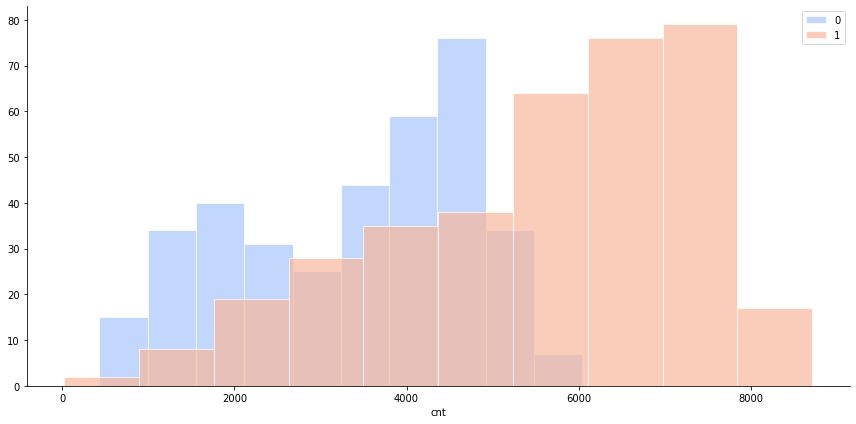

In [15]:
# 這到底在解釋什麼關係阿．．．
g=sns.FacetGrid(day_df, hue='yr', palette='coolwarm',size=6,aspect=2) # palette用於'hue'變量的不同級別的顏色，還有col、row參數。aspect長寬比
g=g.map(plt.hist,'cnt',alpha=0.7, edgecolor='w') # alpha是透明度
plt.legend() # 不寫的話就沒有右上角提示0和1
# plt.show()

Text(0.5, 1.0, 'Number of bikes rented per season')

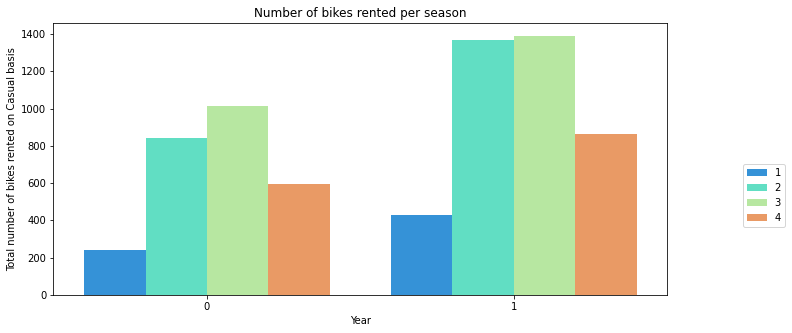

In [16]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=day_df,palette='rainbow', ci=None) # yr和casual的關係，hue表示要看哪個欄位資料
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5)) # bbox_to_anchor控制最右邊小欄的位置
plt.xlabel('Year') 
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

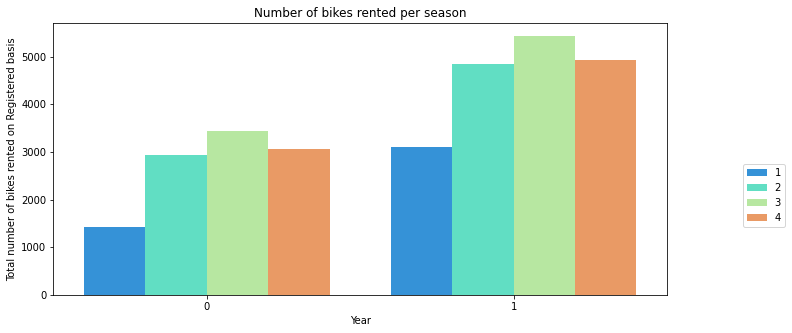

In [17]:
plt.figure(figsize=(11,5))
sns.barplot('yr','registered',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

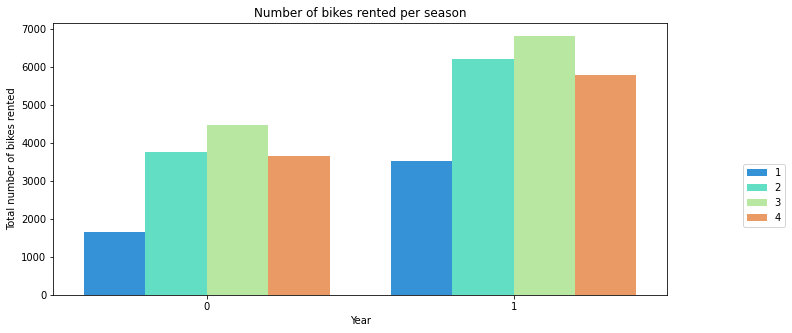

In [18]:
plt.figure(figsize=(11,5))
sns.barplot('yr','cnt',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

* There was a substantial increase in bike renting from year 2011 to year 2012.
* However, the trend for number of bikes rented based on seasons is the same each year.
* Bikes are least rented in Spring and the most during Fall.
* After Spring, there is a sudden increase in bike renting during summer.

In [19]:
df_season_fall=day_df[day_df['season']==3]

In [20]:
df_season_fall.groupby('mnth').size() 

mnth
6    20
7    62
8    62
9    44
dtype: int64

In [21]:
# df_season_fall[mnth] = df_season_fall.mnth = df_season_fall.loc[:,'mnth']
df_season_fall.mnth.nunique() # 表示mnth欄位有幾種不同的值，如同groupby，只是groupby會多計算每種值的數量

4

Fall happens to be 4 months long. Let's examine which month has the highest number of rents and why.

In [22]:
#　我為了驗證下個ｃｅｌｌ在跑什麼數值而寫的
# day_df[(day_df['yr']==0) & (day_df['season']==1)]
print(day_df[(day_df['workingday']==0) & (day_df['mnth']==6)]['cnt'].mean())
print(day_df[(day_df['workingday']==0) & (day_df['mnth']==7)]['cnt'].mean())
print(day_df[(day_df['workingday']==0) & (day_df['mnth']==8)]['cnt'].mean())
print(day_df[(day_df['workingday']==0) & (day_df['mnth']==9)]['cnt'].mean())

6153.941176470588
5405.619047619048
4963.4375
6118.2


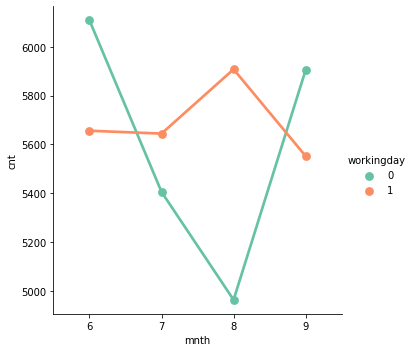

In [23]:
# 畫出 workingday 欄位的 mnth 與 cnt 關係
sns.factorplot('mnth','cnt',hue='workingday',data=df_season_fall, ci=None, palette='Set2')
# Y軸cnt表示平均值

* The renting is the maximum during the month 6(i.e. June: beginning of Fall) and also high during the month 9(i.e. September: end of Fall), considering a holiday/weekday
* Also, when the renting for holidays is the least in the month 8(i.e. August) there is also a increase in bikes rented on a work day.

Let's examine how the weather is responsible.

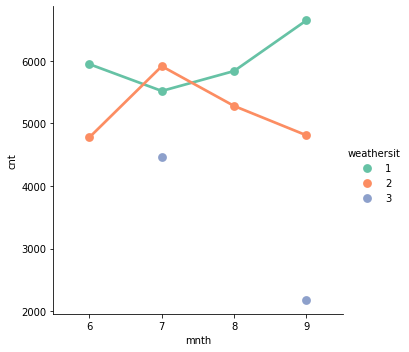

In [24]:
sns.factorplot('mnth','cnt',hue='weathersit',data=df_season_fall, ci=None, palette='Set2')

* There is a much clear weather by the end of Fall and the cloudy, misty weather finds its way back. That very well explains the previous insight on our data, that people enjoy renting and riding bikes on a holiday when the weather is clear.

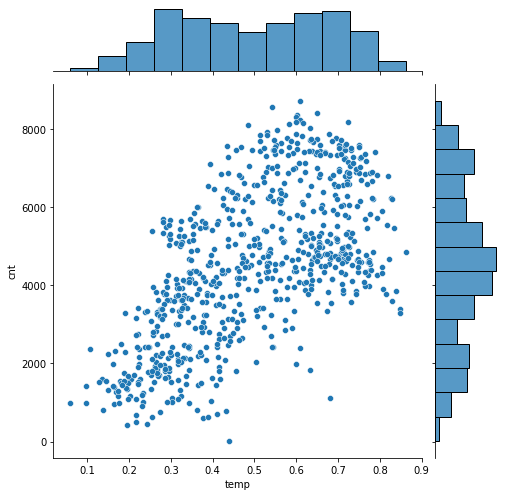

In [25]:
#　這又是他媽的在畫什麼．．．
sns.jointplot('temp','cnt',data=day_df,size=7) # kind：scatter,kde,hist,hex,reg,resid，預設為scatter

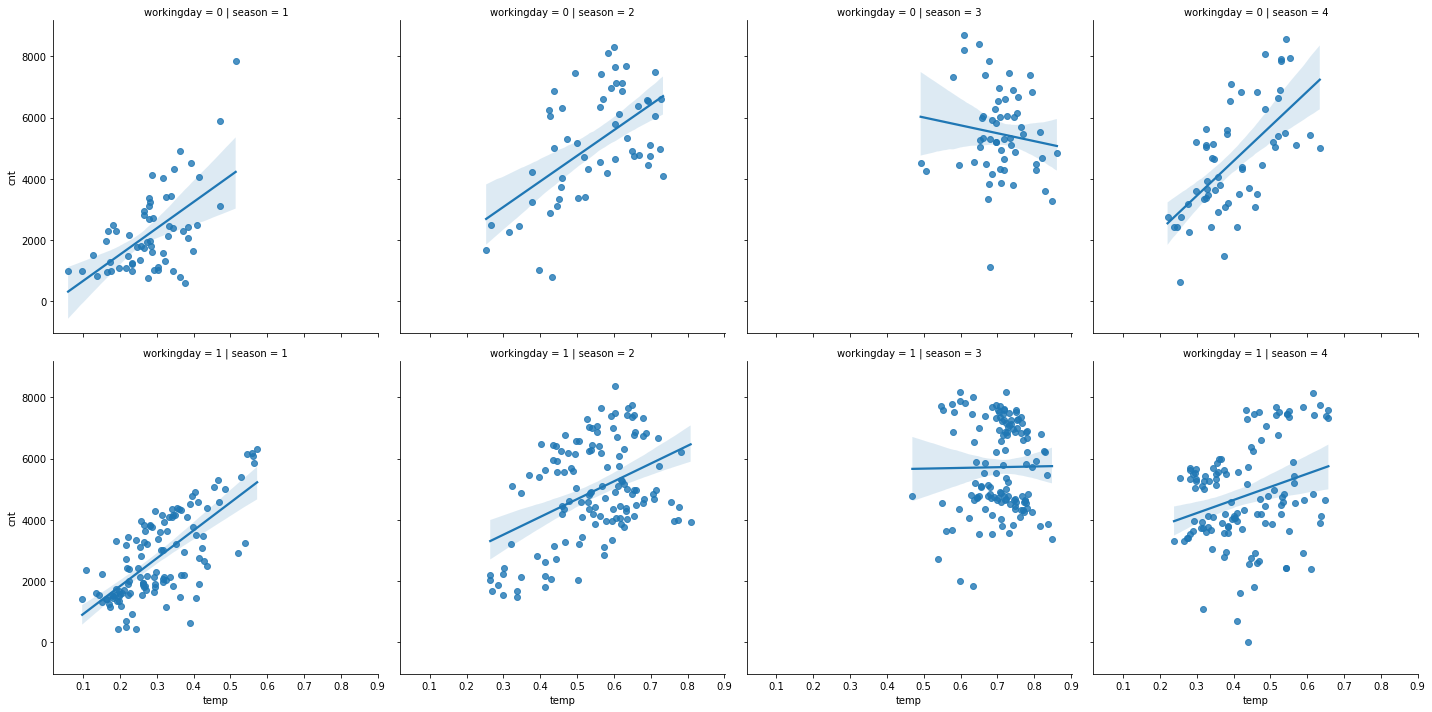

In [26]:
# lmplot是用來繪製迴歸圖的，對所選數據集進行了一元線性迴歸，擬合出了一條最佳的直線，fit_reg表示要不要畫出那條直線
sns.lmplot('temp','cnt',row='workingday',col='season',data=day_df,palette='RdBu_r',fit_reg=True)

So, people prefer more and more cycling as the days get hotter.

In [27]:
hour_df.drop('instant',axis=1,inplace=True)

In [28]:
hour_df.head(3)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


<AxesSubplot:>

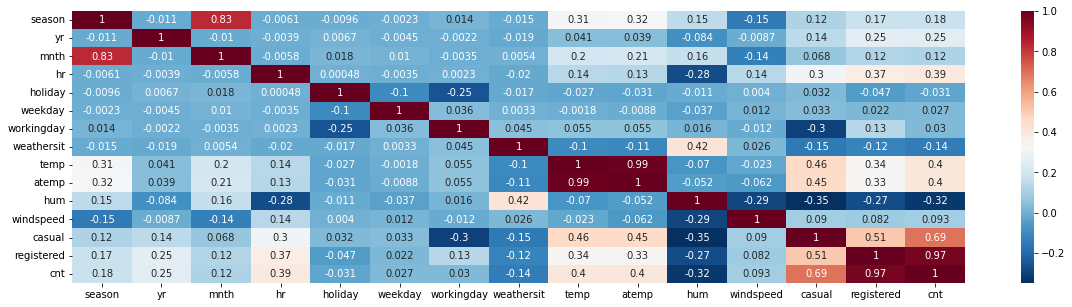

In [29]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(hour_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hour_df.corr(),cmap='RdBu_r', annot=True)

<AxesSubplot:>

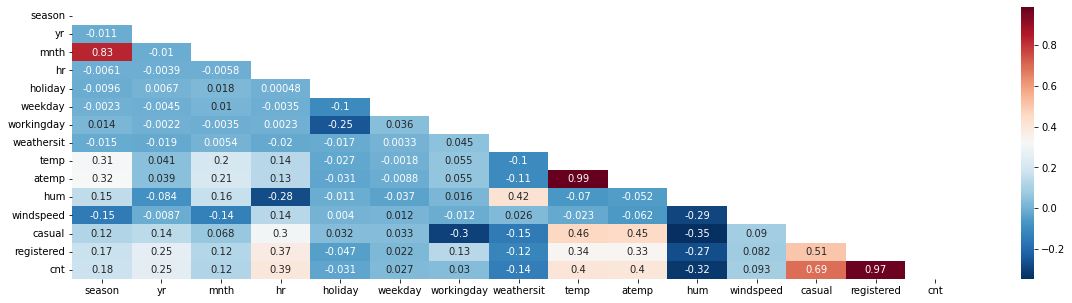

In [30]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(hour_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hour_df.corr(),cmap='RdBu_r',mask=mask, annot=True) # 加了mask參數就看不到上半部的值，不過反正是對稱，也沒差

<AxesSubplot:>

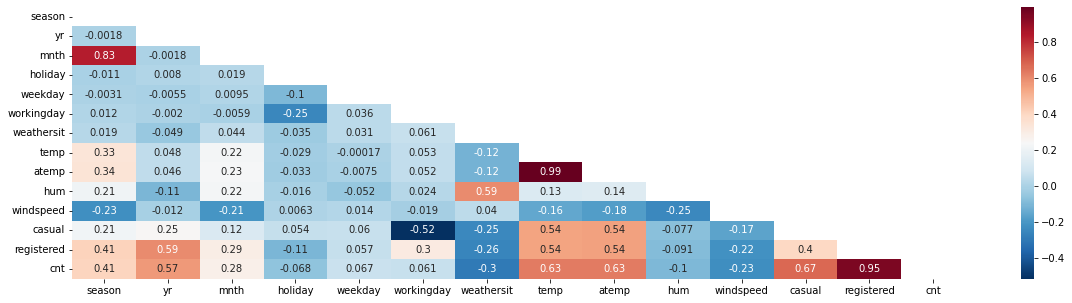

In [31]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(day_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(day_df.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [32]:
# 為什麼要合併阿？
df=pd.merge(day_df,hour_df,how='left',left_on='dteday',right_on='dteday')
#　how是指join的方式，left_on:Column or index level names to join on in the left DataFrame

In [33]:
day_df.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [34]:
hour_df.head(1)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [35]:
df.columns

Index(['dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x', 'weekday_x',
       'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x', 'hum_x',
       'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'season_y', 'yr_y',
       'mnth_y', 'hr', 'holiday_y', 'weekday_y', 'workingday_y',
       'weathersit_y', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 'casual_y',
       'registered_y', 'cnt_y'],
      dtype='object')

In [36]:
df.head()

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:>

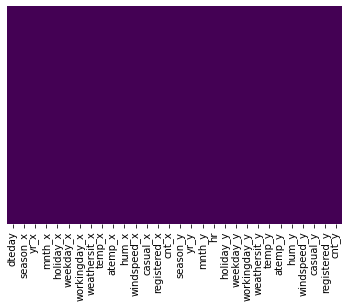

In [37]:
# 這又在幹嘛...
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

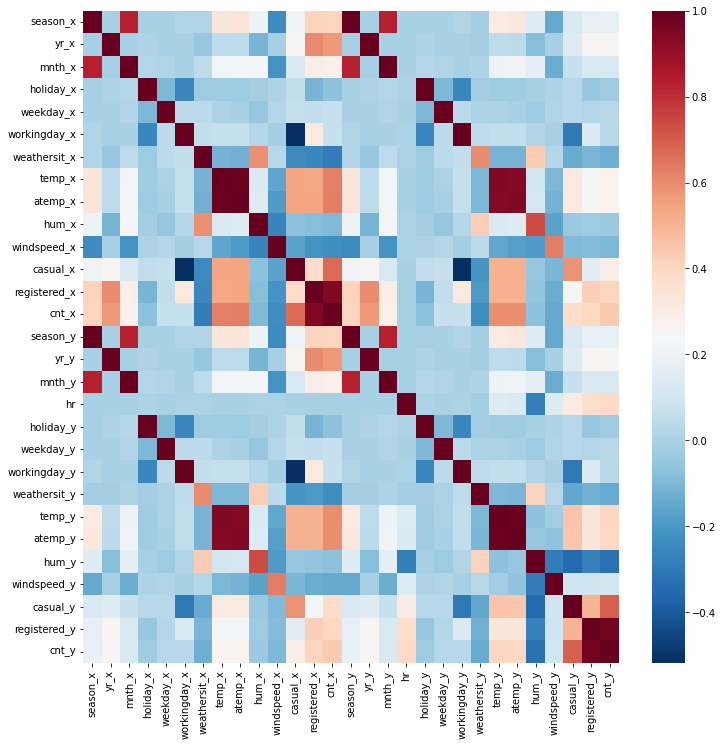

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='RdBu_r')

In [39]:
X=df.drop(['dteday','cnt_y'],axis=1)
y=df['cnt_y']

In [40]:
df.columns

Index(['dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x', 'weekday_x',
       'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x', 'hum_x',
       'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'season_y', 'yr_y',
       'mnth_y', 'hr', 'holiday_y', 'weekday_y', 'workingday_y',
       'weathersit_y', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 'casual_y',
       'registered_y', 'cnt_y'],
      dtype='object')

**Now, let's predict the trend of renting on hourly basis**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm=LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
predictions=lm.predict(X_test)

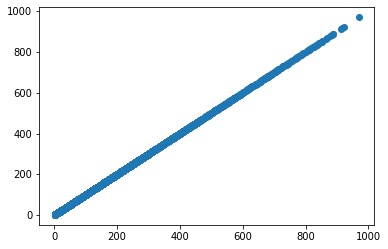

In [47]:
plt.scatter(y_test,predictions)

In [48]:
from sklearn import metrics

In [49]:
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  1.3482193241886973e-12
MSE=  3.2687014628992334e-24
RMS=  1.8079550500217735e-12


In [50]:
pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])

,Coefficient
season_x,-2.519216e-05
yr_x,4.943795e-07
mnth_x,-5.095225e-08
holiday_x,9.994784e-08
weekday_x,2.095206e-06
workingday_x,8.229629e-07
weathersit_x,-2.423110e-15
temp_x,-7.422841e-13
atemp_x,4.909923e-13
hum_x,1.215749e-13


<AxesSubplot:xlabel='cnt_y', ylabel='Density'>

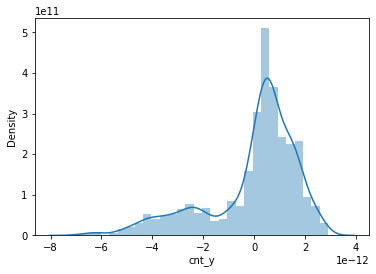

In [51]:
sns.distplot(y_test-predictions,bins=30)